# Projeto 3 Ciência de Dados - Classificadores

Aluno: Lucas Antunes Reis

Professor responsável: Francisco Rodrigues

## Funções: Classificador Bayesiano paramétrico e não paramétrico, Visualização da correlação entre os dados

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

def corr_visualize(df):
    fig = plt.figure(figsize = (12,12))
    axs = fig.add_subplot(111)
    cmap = cm.get_cmap('Blues',30)

    labels = df.columns
    axs.set_xticklabels(labels, rotation= 30, fontsize = 15)
    axs.set_yticklabels(labels, rotation= 30, fontsize = 15)

    cax = axs.imshow(df.corr(), interpolation="nearest", cmap=cmap)

    fig.colorbar(cax)
    plt.show()

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
# data - > dado a ser analisado
# h -> largura
# p -> porção dos dados a ser analisada

def bayes_parametrico(data, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    #p = 0.5 # fração dos dados que serão usados para treino
    x_train, x_test, y_train, y_test = train_test_split(x, target, train_size = p, random_state = 42)

    ## Matriz para armazenar as probabilidades de um dado pertencer aquela classe

    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 

    Pc = np.zeros(len(classes)) #fraction of elements in each class

    for i in np.arange(0, len(classes)):
        # retorna os elementos pertencentes a classe
        elements = tuple(np.where(y_train == classes[i]))
        
        # calcula a probabilidade de pertencer a essa classe
        Pc[i] = len(elements)/len(y_train) 

        # recebe os atributos dos elementos daquela classe e calcula a média
        
        Z = x_train[elements,:][0]
        m = np.mean(Z, axis = 0)

        # Calcula a matriz de covariancia dos atributos
        cv = np.cov(np.transpose(Z))


        for j in np.arange(0,x_test.shape[0]):
            x = x_test[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    for i in range(x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
    return score

In [26]:
import numpy as np
# data - > dado a ser analisado
# h -> largura
# p -> porção dos dados a ser analisada

def bayes_nao_parametrico(data, h, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    #p = 0.5 # fração dos dados que serão usados para treino
    x_train, x_test, y_train, y_test = train_test_split(x, target, train_size = p, random_state = 42)

    ## Matriz para armazenar as probabilidades de um dado pertencer aquela classe

    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
    
    Pc = np.zeros(len(classes)) 

    for i in np.arange(0, len(classes)):
        # retorna os elementos pertencentes a classe
        elements = tuple(np.where(y_train == classes[i]))
        
        # calcula a probabilidade de pertencer a essa classe
        Pc[i] = len(elements)/len(y_train) 

        # recebe os atributos dos elementos daquela classe e calcula a média
        
        Z = x_train[elements,:][0]
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = []
    for i in range(x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    #print(y_pred)
    score = accuracy_score(y_pred, y_test)
    #print('Acuracia:', score)
    return score

## 1) 
Considere a base de dados sobre doenças cardíacas: https://www.kaggle.com/ronitf/heart-disease-uci
Faça o pré-processamento dos dados e classifique os pacientes de acordo com a variável “target”. Considere os
classificadores: Bayesiano paramétrico, Bayesiano não-paramétrico e Naive Bayes.

In [27]:
import pandas as pd
## Leitura dos dados
df = pd.read_csv('data/heart.csv')

In [28]:
# Leitura do conjunto de dados
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


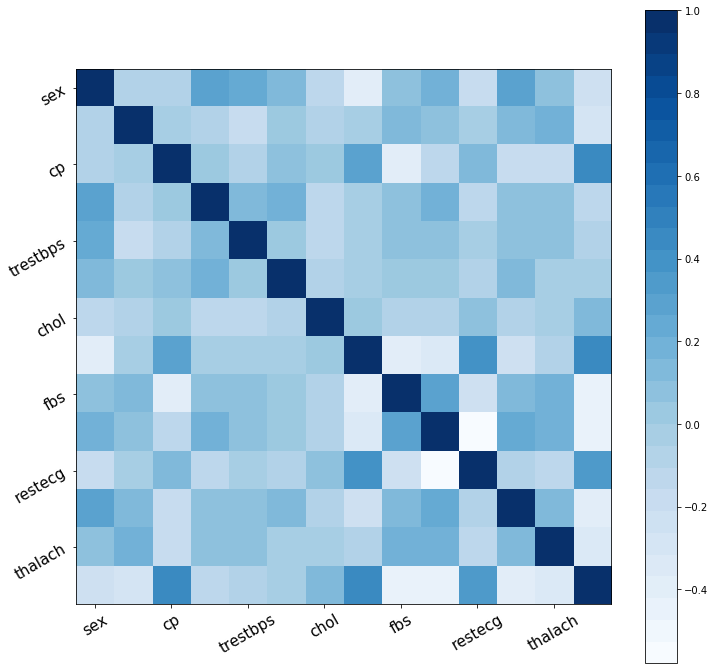

In [31]:
corr_visualize(df)

In [32]:
target = df[df.columns[-1]].unique()
print('Classes: ', target)

Classes:  [1 0]


### a) Bayes Paramétrico

In [80]:
scores = []
score_bp = bayes_parametrico(df,0.7)
scores.append(score_bp)
print('Score Bayes paramétrico: ',score_bp)

Score Bayes paramétrico:  0.7912087912087912


### b) Bayes não paramétrico

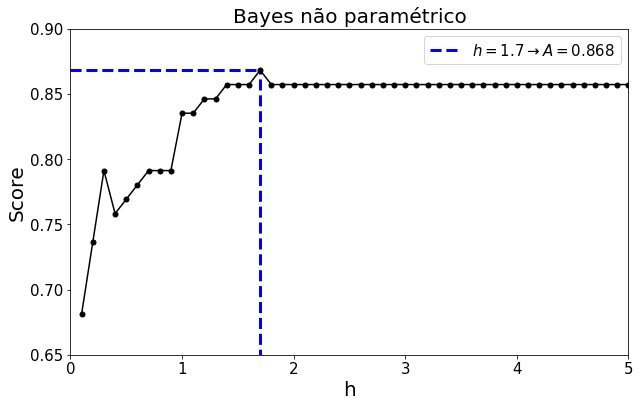

In [81]:
h_values = np.linspace(0.1,5,50)
score = []
for h in h_values:
    score.append(bayes_nao_parametrico(df,h, 0.7))

fig,axs = plt.subplots(figsize = (10,6))

axs.set_title('Bayes não paramétrico', fontsize = 20)
axs.set_xlabel('h', fontsize = 20)
axs.set_ylabel('Score', fontsize = 20)

axs.plot(h_values, score, 'o-' ,color = 'black', markersize = 5)
hmax = h_values[score.index(max(score))]
axs.hlines(max(score),0,hmax,linestyle = '--', linewidth = 3, color = 'blue')
axs.vlines(hmax,0,max(score),linestyle = '--', linewidth = 3,color = 'blue', label = r'$h = {}\rightarrow A = {}$'.format(np.round(hmax,2),max(np.round(score,3))))

scores.append(max(score))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(0,5)
plt.ylim(0.65,0.9)

axs.legend(fontsize = 15)

### c) Naive Bayes

In [82]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = df.to_numpy()

y = data[:,-1]
X = data[:,:-1]


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.7, random_state = 42)

models = [BernoulliNB(), GaussianNB()];labels = ['NB-Gaussian','NB-Bernoulli']
for (model,label) in zip(models,labels):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred,y_test)
    print('Score ',label,score)
    scores.append(score)

Score  NB-Gaussian 0.7793427230046949
Score  NB-Bernoulli 0.8356807511737089


In [85]:
labels = ['Bayes paramétrico','Bayes não paramétrico','NB-Gaussian','NB-Bernoulli']
for score,label in zip(scores, labels):
    print(label,':',score)

Bayes paramétrico : 0.7912087912087912
Bayes não paramétrico : 0.8681318681318682
NB-Gaussian : 0.7793427230046949
NB-Bernoulli : 0.8356807511737089


Considerando os classificadores acima, **Bayes não paramétrico** obteve o melhor score **0.87**.

# 2) 

No classificar não-paramétrico, verifique o efeito do hiperparâmetro h na classificação dos dados de
diabetes, encontrando seu melhor valor:https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [101]:
## Leitura dos dados
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

data = df.to_numpy()

X = data[:,:-1]
y = data[:,-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Av. :', X.mean(axis = 0))
print('Std.:', X.std(axis = 0))


x_train,x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)


Av. : [-6.47630098e-17 -9.25185854e-18  1.50342701e-17  1.00613962e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16]
Std.: [1. 1. 1. 1. 1. 1. 1. 1.]


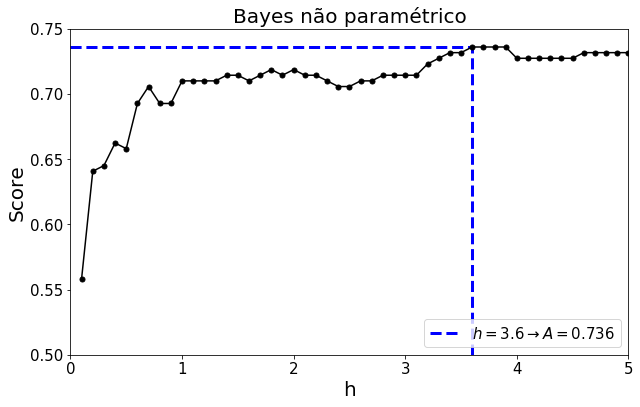

In [115]:
from sklearn.neighbors import KernelDensity

df = pd.read_csv('data/diabetes.csv')

h_values = np.linspace(0.1,5,50)
score = []
for h in h_values:
    score.append(bayes_nao_parametrico(df,h, 0.7))

fig,axs = plt.subplots(figsize = (10,6))

axs.set_title('Bayes não paramétrico', fontsize = 20)
axs.set_xlabel('h', fontsize = 20)
axs.set_ylabel('Score', fontsize = 20)

axs.plot(h_values, score, 'o-' ,color = 'black', markersize = 5)
hmax = h_values[score.index(max(score))]
axs.hlines(max(score),0,hmax,linestyle = '--', linewidth = 3, color = 'blue')
axs.vlines(hmax,0,max(score),linestyle = '--', linewidth = 3,color = 'blue', label = r'$h = {}\rightarrow A = {}$'.format(np.round(hmax,23),max(np.round(score,3))))

scores.append(max(score))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(0,5)
plt.ylim(0.5,0.75)

axs.legend(loc = 4,fontsize = 15)

# 3) 
Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico, variando o ruído (noise).

(array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <a list of 8 Text yticklabel objects>)

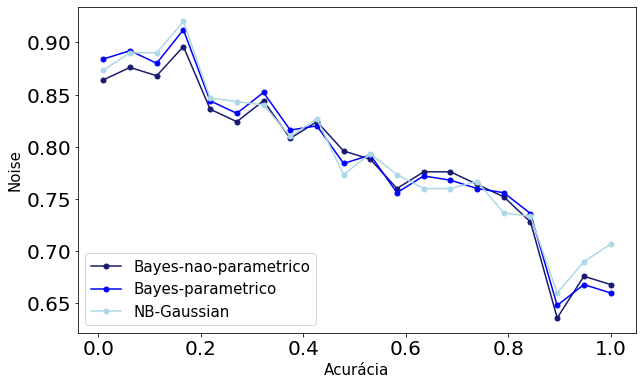

In [167]:
from sklearn import datasets

noise = np.linspace(0.01,1,20)
n_samples = 1000

score_bp,score_bnp,score_nb = [],[],[];
for n in noise:
    data = datasets.make_moons(n_samples=n_samples, noise = n)
    X = data[0]
    y = data[1]

    df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})
    h = 3.6
    score = bayes_nao_parametrico(df,h,0.75)
    score_bp.append(score)
    
    score = bayes_parametrico(df,0.75)
    score_bnp.append(score)
    
    data = df.to_numpy()
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
    
    model = GaussianNB()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    score_nb.append(accuracy_score(y_pred,y_test))
    
scores = [score_bp,score_bnp, score_nb]
fig, axs = plt.subplots(figsize = (10,6))

axs.set_ylabel('Noise',fontsize = 15)
axs.set_xlabel('Acurácia',fontsize = 15)

labels = ['Bayes-nao-parametrico','Bayes-parametrico','NB-Gaussian']
colors = ['midnightblue','blue','lightblue']
for (score, label,cor) in zip(scores,labels,colors):
    axs.plot(noise,score, 'o-',markersize= 5,color = cor,label = label)
axs.legend(loc=3, fontsize = 15)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# 4)
Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos
Naive Bayes, k-vizinhos e regressão logística.

Acurácia  Regressão Logistica  =  0.8366666666666667
Acurácia  KNN  =  0.86
Acurácia  N-B Gaussian  =  0.84
Acurácia  N-B Bernoulli  =  0.7866666666666666


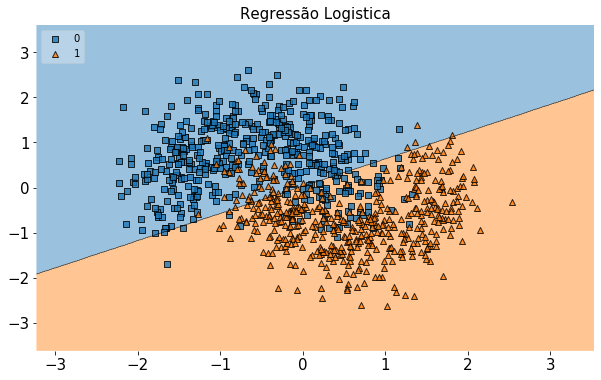

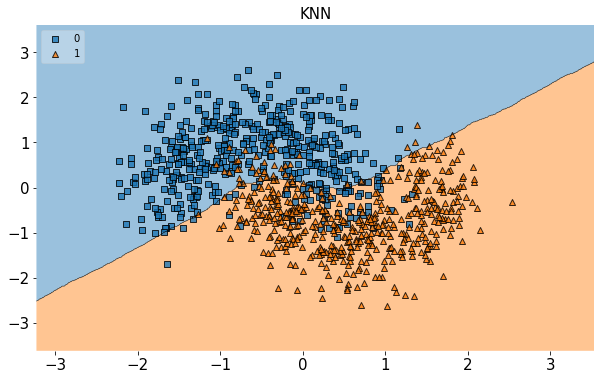

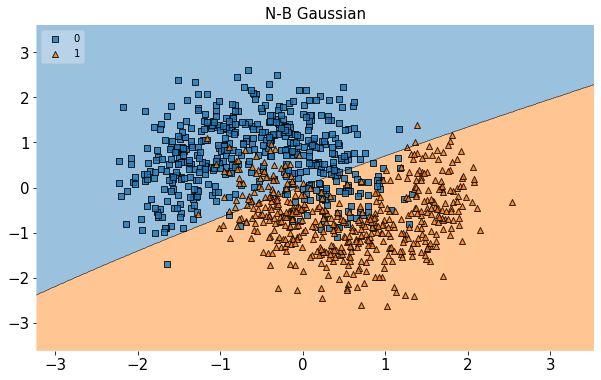

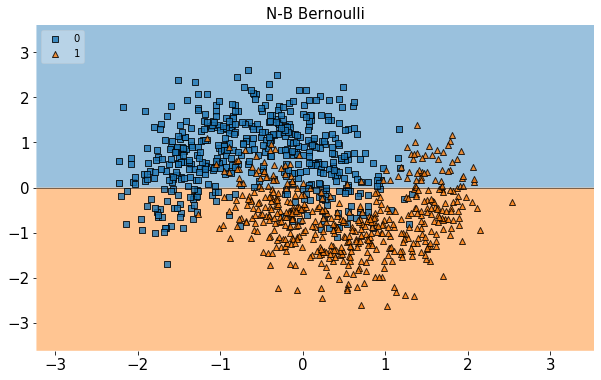

In [395]:
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise = 0.3)
X = data[0]
y = data[1]
df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

models = [LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000),KNeighborsClassifier(n_neighbors = 150), GaussianNB(), BernoulliNB()]
titles = ['Regressão Logistica', 'KNN', 'N-B Gaussian', 'N-B Bernoulli']

for model,title in zip(models, titles):
    #model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    #model = KNeighborsClassifier(n_neighbors = 150)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)

    
    fig,axs = plt.subplots(figsize = (10,6))
    axs.set_title(title, fontsize = 15)
    print('Acurácia ',title,' = ', score)
    plot_decision_regions(X, y, clf=model, legend=2)
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)


### 5)
Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos
– mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre
os centros.

#### Visualizando os dados com diferentes centro de pontos

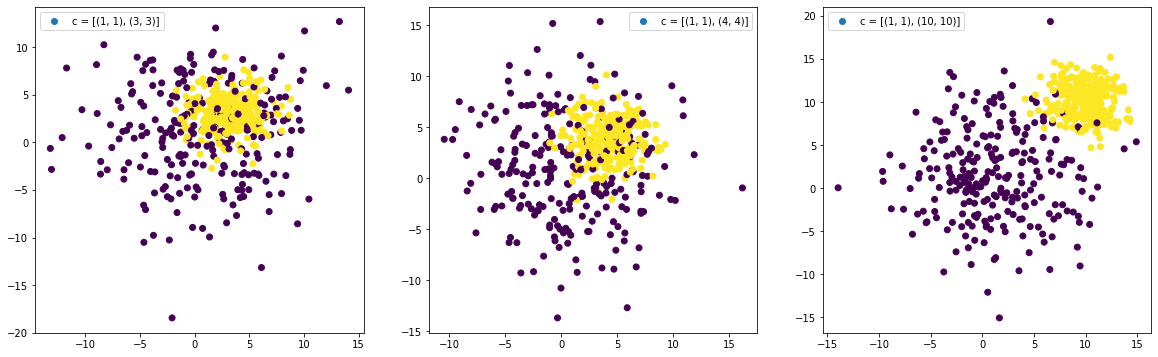

In [178]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


n = 500
r1 = (1,1)
c = [[(1,1), (3,3)],[(1,1),(4,4)],[(1,1),(10,10)]]#center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class

fig,axs = plt.subplots(1,3, figsize = (20,6))
for ax,ci in zip(axs.flat,c):
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= ci)

    #df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1], 'y': y})

    #x_train, x_test, y_train, y_test = norm_data(df, 0.75)
    #model = GaussianNB()
    #model.fit(x_train, y_train)

    #y_pred = model.predict(x_test)
    #score = accuracy_score(y_pred, y_test)


    ax.scatter(X[:,0],X[:,1], c=y, label = 'c = {}'.format(ci))
    ax.legend()
plt.show(True)

#### Distância entre os centros e função para normalizar os dados

In [183]:
def dist(x1,x2):
    return np.sqrt((x2[0]-x1[0])**2 + (x2[1]-x2[1])**2)

def norm_data(data, p):
    ## Obtendo as classes e os atributos do conjunto de dados
    classes = np.array(np.unique(data[data.columns[-1]]))
    cols = data.columns

    ## # de linhas e colunas do conjunto de dados
    nrow,ncol = data.shape

    ## Separando os dados e o conjunto target

    data = data.to_numpy()
    x = data[:, 0:ncol - 1]
    target = data[:,-1]

    ## Normalizando os atributos de modo que u = 0 e std = 1

    norm = StandardScaler().fit(x)
    x = norm.transform(x)

    ## Separando nosso conjunto de dados em conjunto de teste e treino utilizando train_test_split

    return train_test_split(x, target, train_size = p, random_state = 42)

#### Gerando os DataFrames com diferentes centros e calculando a acurácia dos modelos

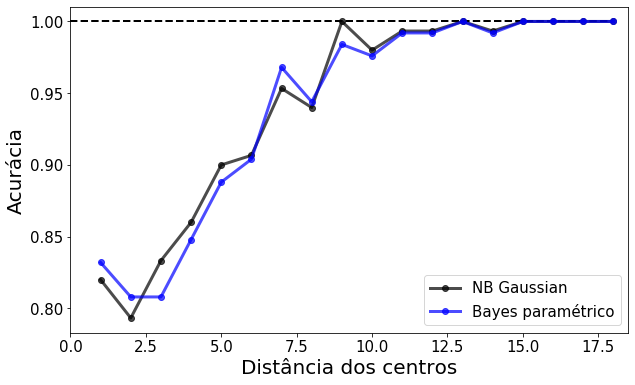

In [248]:
acur_nbg = []
acur_bp = []
distancia = []
n = 500
r1 = (1,1)

#c = [r1, (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class

for xi,yi in zip(np.arange(2,20), np.arange(2,20)):
    c = [r1,(xi,yi)]
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= c)

    df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1], 'y': y})

    x_train, x_test, y_train, y_test = norm_data(df, 0.7)
    
    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    acur_nbg.append(score)
    
    bp = bayes_parametrico(df, 0.75)
    acur_bp.append(bp)
    
    d = dist(c[0],c[1])
    distancia.append(d)

fig,axs = plt.subplots(figsize = (10,6))


axs.plot(distancia, acur_nbg, 'o-', label = 'NB Gaussian', color = 'black', linewidth = 3, alpha = 0.7)
axs.plot(distancia, acur_bp, 'o-', label = 'Bayes paramétrico', color = 'blue', linewidth = 3, alpha = 0.7)
axs.hlines(1, 0,max(distancia),linestyle = '--', linewidth = 2,)


axs.set_ylabel('Acurácia', fontsize = 20)
axs.set_xlabel('Distância dos centros', fontsize = 20)

axs.legend(fontsize = 15, loc = 'lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(0,max(distancia)+0.5)
plt.show()

## 6)

Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído
(noise) no intervalo [0,1]. No caso do algoritmo k-vizinho, use o método selection.GridSearchCV da biblioteca
sciki-learn para determinar a melhor medida de distância e o valor de k.

#### Gerando o conjunto de dados

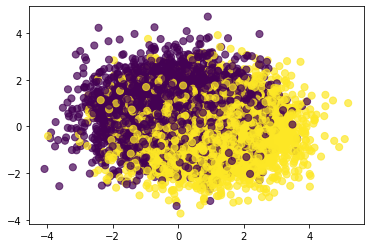

In [391]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 10000
data = datasets.make_moons(n_samples=n_samples, noise=1)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

## Escolhendo os melhores parâmetros - KNN

In [392]:
df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})
x_train, x_test, y_train, y_test = norm_data(df, 0.05) 


## KNN - vizinhos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : np.arange(1,30),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )

#for 
gs_results = gs.fit(x_train,y_train)


Fitting 3 folds for each of 174 candidates, totalling 522 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 522 out of 522 | elapsed:    2.6s finished


In [393]:
print('Melhor score: ',gs_results.best_score_)
print('Estimador: ',gs_results.best_estimator_)
print('Parâmetros: ', gs_results.best_params_)

Melhor score:  0.7400500204410457
Estimador:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')
Parâmetros:  {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}


#### 

[]

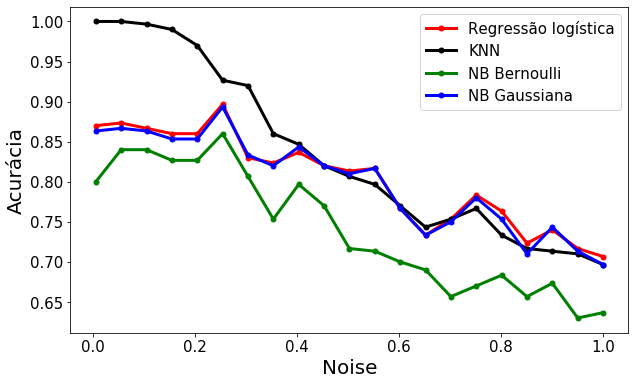

In [394]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


n_samples = 1000

noise = np.linspace(0.005,1,21)
knn = []
rl = []
nbber = []
nbgauss = []
nbmul = []
for n in noise:
    data = datasets.make_moons(n_samples=n_samples, noise = n)
    X = data[0]
    y = data[1]
    df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y': data[1]})
    
    
    x_train, x_test, y_train, y_test = norm_data(df, 0.7) 

    model1 = BernoulliNB()
    model1.fit(x_train, y_train)
    
    model2 = GaussianNB()
    model2.fit(x_train, y_train)
    
    model3 = gs_results.best_estimator_
    model3.fit(x_train,y_train)
    
    model4 = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model4.fit(x_train,y_train)
    
    y_pred1 = model1.predict(x_test)
    score = accuracy_score(y_pred1, y_test)
    nbber.append(score)
    
    y_pred2 = model2.predict(x_test)
    score = accuracy_score(y_pred2, y_test)
    nbgauss.append(score)
    
    y_pred3 = model3.predict(x_test)
    score = accuracy_score(y_pred3, y_test)
    knn.append(score)
    
    y_pred4 = model4.predict(x_test)
    score = accuracy_score(y_pred4, y_test)
    rl.append(score)
    
fig,axs = plt.subplots(figsize = (10,6))

axs.plot(noise, rl, 'o-', linewidth = 3, markersize = 5, label = 'Regressão logística', color = 'red')
axs.plot(noise, knn, 'o-', linewidth = 3, markersize = 5, label = 'KNN', color = 'black')
axs.plot(noise, nbber, 'o-', linewidth = 3, markersize = 5, label = 'NB Bernoulli', color = 'green')
axs.plot(noise, nbgauss, 'o-', linewidth = 3, markersize = 5, label = 'NB Gaussiana', color = 'blue')


axs.set_xlabel('Noise', fontsize = 20)
axs.set_ylabel('Acurácia', fontsize = 20)
axs.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#axs.set_yscale('log')
plt.plot()

## 7)
Considerando os dados do código anterior, compare os algoritmos: árvores de decisão, forestas aleatórias e bagging. Use o método selection.GridSearchCV da biblioteca sciki-learn para determinar os melhores
parâmetros dos modelos.

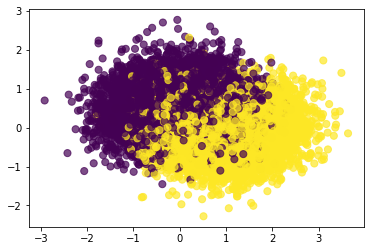

In [255]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
n_samples = 10000
data = datasets.make_moons(n_samples=n_samples, noise=0.5)
X = data[0]
y = data[1]

df = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'Y': y})
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

### GridSearchCV - Árvores de decisão 

In [257]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [276]:
print('Best score: ', grid_search_cv.best_score_)
print('Params: ', grid_search_cv.best_params_)
print('Params: ', grid_search_cv.best_estimator_)

Best score:  0.8142856863013727
Params:  {'max_leaf_nodes': 16, 'min_samples_split': 2}
Params:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


### GridSearch - Random Forest 

In [274]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
gs_results = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs_results.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [275]:
print('Best score: ', gs_results.best_score_)
print('Params: ', gs_results.best_params_)
print('Params: ', gs_results.best_estimator_)

Best score:  0.8252857142857144
Params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Params:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


### GridSearch - Bagging Classifier

In [302]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

#chama o classificador
model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', random_state = 42),
                          n_estimators=10)
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 
# calcula a acurácia do modelo
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8172043010752689


### Modelos

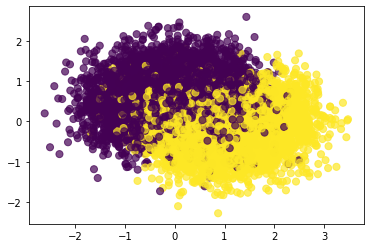

In [272]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
n_samples = 10000
data = datasets.make_moons(n_samples=n_samples, noise=0.5)
X = data[0]
y = data[1]

df = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'Y': y})
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

models = [BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', random_state = 42),
                          n_estimators=10), ]

# 8)

Considere as bases: Vehicle, winequality-red e vertebralcolumn-3C. Compare os classificadores: (a)
Naive Bayes, (b) Florestas aleatórias, (c) k-vizinhos, (d) regressão logística. Considere as medidas: (i) AUC (área
sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia. Ou seja, faça uma tabela para cada base, onde as
linhas representam os classificadores e as colunas, as medidas de avaliação.


## a) Dados Vehicle

## Pré-processamento dos dados

In [278]:
## Leitura do conjunto de dados

df = pd.read_csv('data/Vehicle.csv')
df.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


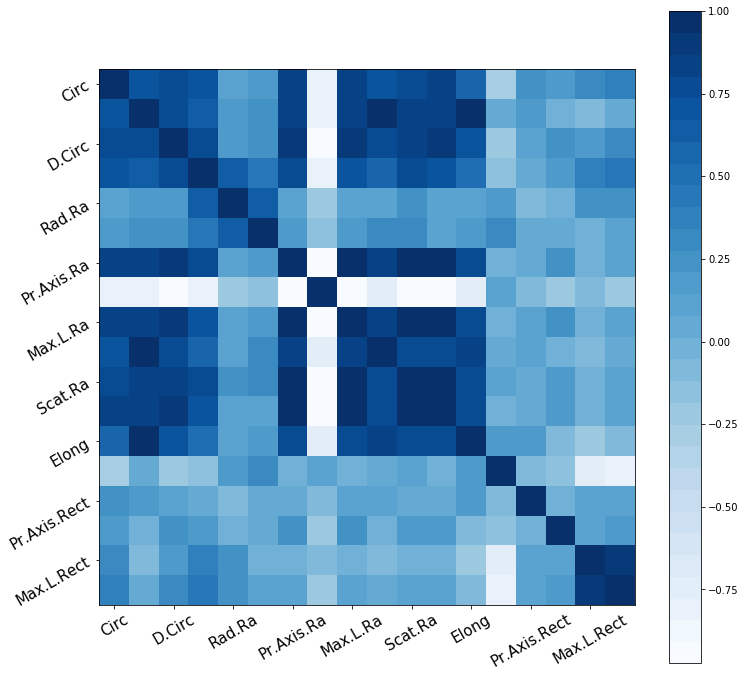

In [279]:
corr_visualize(df)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comp          846 non-null    int64 
 1   Circ          846 non-null    int64 
 2   D.Circ        846 non-null    int64 
 3   Rad.Ra        846 non-null    int64 
 4   Pr.Axis.Ra    846 non-null    int64 
 5   Max.L.Ra      846 non-null    int64 
 6   Scat.Ra       846 non-null    int64 
 7   Elong         846 non-null    int64 
 8   Pr.Axis.Rect  846 non-null    int64 
 9   Max.L.Rect    846 non-null    int64 
 10  Sc.Var.Maxis  846 non-null    int64 
 11  Sc.Var.maxis  846 non-null    int64 
 12  Ra.Gyr        846 non-null    int64 
 13  Skew.Maxis    846 non-null    int64 
 14  Skew.maxis    846 non-null    int64 
 15  Kurt.maxis    846 non-null    int64 
 16  Kurt.Maxis    846 non-null    int64 
 17  Holl.Ra       846 non-null    int64 
 18  Class         846 non-null    object
dtypes: int64

In [281]:
df.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [282]:
classes = df[df.columns[-1]].unique()
print('Classes:', classes)

Classes: ['van' 'saab' 'bus' 'opel']


In [283]:
data = df.to_numpy()

X = data[:,:-1]
y = data[:,-1]

In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Data norm.')
print('Mean : ',X.mean(axis = 0),'\nStd :', X.std(axis = 0))

Data norm.
Mean :  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15] 
Std : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [285]:
from sklearn.model_selection import train_test_split

p = 0.7

x_train,x_test,y_train,y_test = train_test_split(X, y, train_size = p, random_state = 42)

## Avaliação dos classificadores

In [286]:
## KNN - vizinhos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : np.arange(1,30),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )
gs_results = gs.fit(x_train,y_train)


Fitting 3 folds for each of 174 candidates, totalling 522 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 522 out of 522 | elapsed:    3.6s finished


In [287]:
print('Best scores: ', gs_results.best_score_)
print('Best estimator: ', gs_results.best_estimator_)
print('Best params: ', gs_results.best_params_)

Best scores:  0.7246491992684886
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')
Best params:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [303]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

metrics = ['Acurácia', 'Precisão', 'F1', 'AUC']

clfs = [GaussianNB(), BernoulliNB(), KNeighborsClassifier(n_neighbors = 10, weights = 'distance', p = 2, metric = 'manhattan'), LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)]
clf_names = ['NB-Gaussian','NB-Bernoulli', 'KNN', 'Logistic-Regression']
acurs = [];f1s = []; precs = [];
for clf in clfs:
    model = clf
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    acurs.append(acur);f1s.append(f1); precs.append(prec);
    
score_values = pd.DataFrame({'Classificador':clf_names,metrics[0]:acurs, metrics[1]:f1s, metrics[2]: precs})
score_values

,Classificador,Acurácia,Precisão,F1
0,NB-Gaussian,0.784946,0.786609,0.789093
1,NB-Bernoulli,0.774194,0.776894,0.780299
2,KNN,0.763441,0.763497,0.765479
3,Logistic-Regression,0.827957,0.832465,0.841187


## b) Winequality-red

In [385]:
import pandas as pd

df = pd.read_csv('data/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [386]:
classes = df[df.columns[-1]].unique()

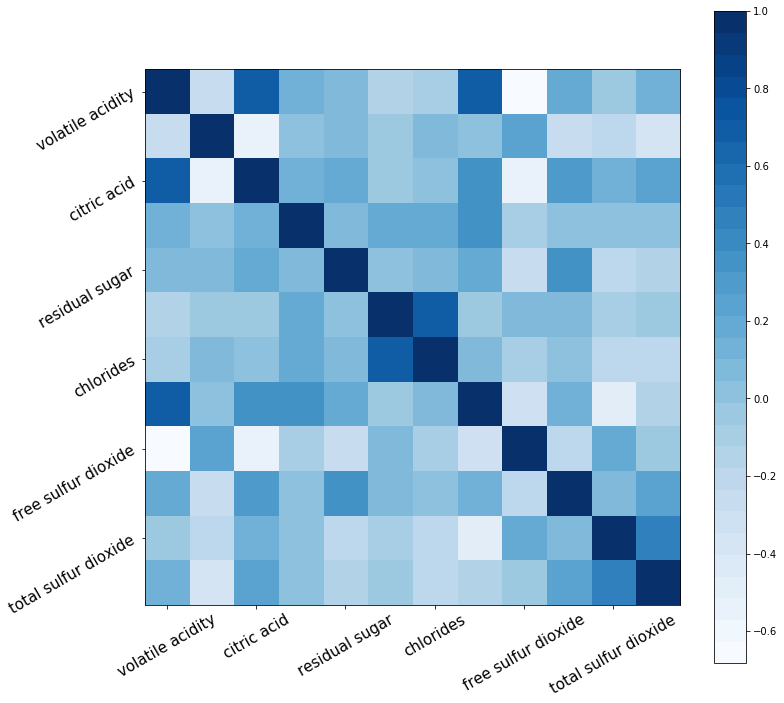

In [387]:
# correlação entre o conjunto de dados

corr_visualize(df)

In [388]:
## Normalizando o conjunto de dados

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [389]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gd_params = {
    'n_neighbors':np.arange(1,30),
    'metric':['euclidean','manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    gd_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1,
)

grid_res = gs.fit(x_train,y_train)


print('Melhor pontuação:', grid_res.best_score_)
print('Estimador:', grid_res.best_estimator_)
print('Parametros:', grid_res.best_params_)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.4s


Melhor pontuação: 0.5924932975871314
Estimador: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')
Parametros: {'metric': 'euclidean', 'n_neighbors': 16}


[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    4.2s finished


In [390]:
## Importante classificadores
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
## Importando métricas
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

metrics = ['Modelos','Acurácia', 'Precisão', 'F1', 'AUC']

models = [BernoulliNB(), GaussianNB(), KNeighborsClassifier(n_neighbors = 16, p = 2, metric = 'euclidean'), LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)]
labels = ['NB-Bernoulli','NB-Gaussian', 'KNN','Logistic-Regression']

acur_scores, f1_scores, prec_scores = [],[],[];

for mod in models:
    model = mod
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    acur_scores.append(acur);f1_scores.append(f1); prec_scores.append(prec);

data = {
    metrics[0]:labels,
    metrics[1]:acur_scores,
    metrics[2]:f1_scores,
    metrics[3]:prec_scores,
}
df = pd.DataFrame(data)
df

,Modelos,Acurácia,Precisão,F1
0,NB-Bernoulli,0.564583,0.583300,0.610131
1,NB-Gaussian,0.537500,0.535281,0.537389
2,KNN,0.554167,0.573399,0.598053
3,Logistic-Regression,0.564583,0.589039,0.622356


## c) Vertebral Column-3D

In [296]:
import pandas as pd

df = pd.read_csv('data/vertebralcolumn-3C.csv')
df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [297]:
classes = df[df.columns[-1]].unique()

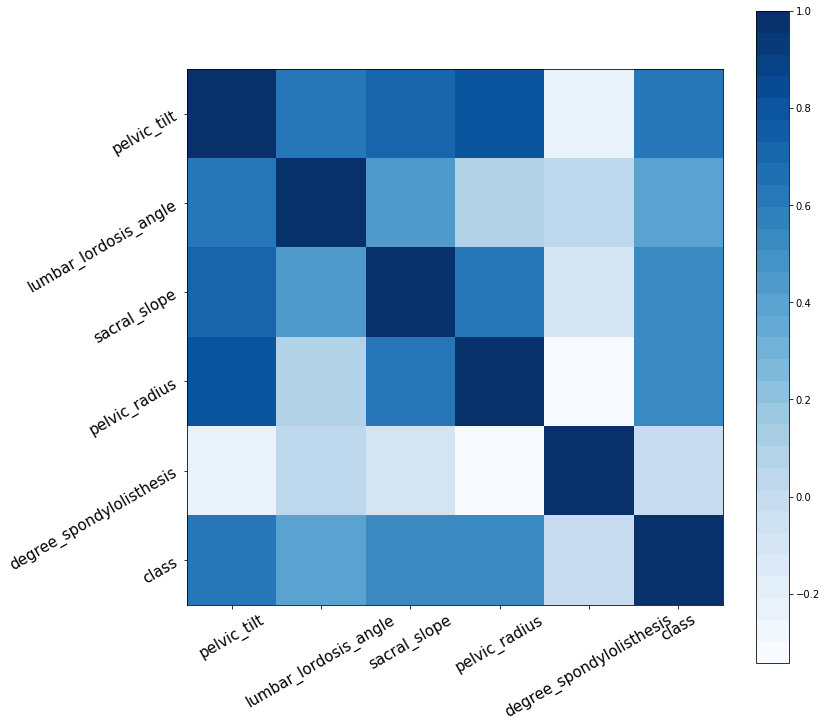

In [298]:
# correlação entre o conjunto de dados

corr_visualize(df)

In [299]:
## Normalizando o conjunto de dados

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gd_params = {
    'n_neighbors':np.arange(1,30),
    'metric':['euclidean','manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    gd_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1,
)

grid_res = gs.fit(x_train,y_train)


print('Melhor pontuação:', grid_res.best_score_)
print('Estimador:', grid_res.best_estimator_)
print('Parametros:', grid_res.best_params_)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Melhor pontuação: 0.8018138001014713
Estimador: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')
Parametros: {'metric': 'euclidean', 'n_neighbors': 14}


[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    0.5s finished


In [318]:
## Importante classificadores
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
## Importando métricas
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

metrics = ['Acurácia', 'Precisão', 'F1', 'AUC']

models = [BernoulliNB(), GaussianNB(), KNeighborsClassifier(n_neighbors = 16, p = 2, metric = 'euclidean'),LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)]
labels = ['NB-Bernoulli','NB-Gaussian', 'KNN','Logistic-Regression']

acur_scores, f1_scores, prec_scores = [],[],[];

for mod in models:
    model = mod
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    acur_scores.append(acur);f1_scores.append(f1); prec_scores.append(prec);

data = {
    metrics[0]:labels,
    metrics[1]:acur_scores,
    metrics[2]:f1_scores,
    metrics[3]:prec_scores,
}
df = pd.DataFrame(data)
df

,Acurácia,Precisão,F1,AUC
0,NB-Bernoulli,0.564583,0.583300,0.610131
1,NB-Gaussian,0.537500,0.535281,0.537389
2,KNN,0.554167,0.573399,0.598053
3,Logistic-Regression,0.564583,0.589039,0.622356


## d) Dados Titanic

In [366]:
dfids = pd.read_csv('titanic/gender_submission.csv')
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [368]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train = pd.get_dummies(train)
Id_test_pass = test['PassengerId']
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test = pd.get_dummies(test)

In [369]:
# substituicao no conjunto de treinamento
averages = train.mean(axis=0)
nrow,ncol = train.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(train.iloc[i,j]) == True):
            train.iloc[i,j] = averages[j]

# substituicao no conjunto de teste
averages_test = test.mean(axis=0)
nrow,ncol = test.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(test.iloc[i,j]) == True):
            test.iloc[i,j] = averages_test[j]

In [370]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [371]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


## Normalizando os dados

In [372]:
from sklearn.preprocessing import StandardScaler

train = train.to_numpy()
test = test.to_numpy()

X = train[:,1:]
y = train[:,0]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

scaler = StandardScaler().fit(test)
X_test = scaler.transform(test)

## Efetuando a classificação

In [564]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gd_params = {
    'n_neighbors':np.arange(1,30),
    'metric':['euclidean','manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    gd_params,
    refit=True,
    verbose = 1,
    cv = 3,
    n_jobs = -1,
)

grid_knn = gs.fit(X,y)


print('Melhor pontuação:', grid_knn.best_score_)
print('Estimador:', grid_knn.best_estimator_)
print('Parametros:', grid_knn.best_params_)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s


Melhor pontuação: 0.8271604938271605
Estimador: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
Parametros: {'metric': 'manhattan', 'n_neighbors': 8}


[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    3.2s finished


In [562]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200],
    'criterion' :['gini', 'entropy']
}
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_rfc.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [565]:
## Importante classificadores
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
## Importando métricas
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score


metrics = ['Modelo','Acurácia', 'Precisão', 'F1', 'AUC']

models = [GaussianNB(), grid_rfc.best_estimator_ , grid_knn.best_estimator_,LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)]
labels = ['NB-Gaussian','Random Forest', 'KNN','Logistic-Regression']

acur_scores, f1_scores, prec_scores, roc_scores = [],[],[],[];

x_test,x_train,y_test,y_train = train_test_split(X,y, train_size = 0.7)
for mod in models:
    model = mod
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acur = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test, average = 'weighted')
    prec = precision_score(y_pred,y_test, average = 'weighted')
    roc = roc_auc_score(y_pred,y_test)
    acur_scores.append(acur);f1_scores.append(f1); prec_scores.append(prec);roc_scores.append(roc);

data = {
    metrics[0]:labels,
    metrics[1]:acur_scores,
    metrics[2]:f1_scores,
    metrics[3]:prec_scores,
    metrics[4]:roc_scores
}
df = pd.DataFrame(data)
df

,Modelo,Acurácia,Precisão,F1,AUC
0,NB-Gaussian,0.788122,0.787813,0.787570,0.776908
1,Random Forest,0.799358,0.800444,0.802241,0.790166
2,KNN,0.791332,0.803716,0.847168,0.815613
3,Logistic-Regression,0.804173,0.804971,0.806192,0.794911


## 9)
 Considere os código abaixo. Avalie como o desbalanceamento influencia nos resultados usando as
medidas i) AUC (área sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia. Elabore um estudo e proceda
com o desenvolvimento dos códigos. Dica: use o método de validação cruzada estratificado na classificação e
discuta a comparação com o caso sem o uso de estratificação

Counter({0: 9900, 1: 100})


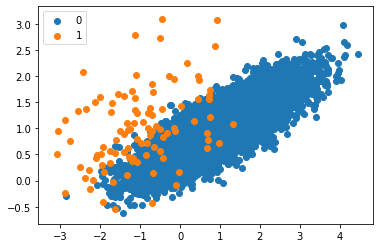

In [423]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [403]:
from sklearn.preprocessing import StandardScaler
def normalize_data(X):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    return X

In [435]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

def classificacao_nao_estratificada(model, model_name):
    mauc = list()
    macur = list()
    mf1 = list()
    mprec = list()
    
    balanco = np.linspace(0.19,0.99,20)
    for i in balanco:
        X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
        n_clusters_per_class=1, weights= [i] , flip_y=0, random_state=1)


        X = normalize_data(X)
        x_test, x_train, y_test, y_train = train_test_split(X,y, train_size = 0.7, random_state = 42)

        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        macur.append(accuracy_score(y_pred,y_test))
        mauc.append(roc_auc_score(y_pred,y_test))
        mf1.append(f1_score(y_pred,y_test))
        mprec.append(precision_score(y_pred,y_test))
    
    colors = ['red', 'green', 'black', 'gray']
    labels = ['Acurácia','AUC','F1','Precisão']
    dados = [macur,mauc,mf1,mprec]
    
    fig,axs = plt.subplots(figsize = (10,6))
    for cor, label,med in zip(colors,labels, dados):
        axs.plot(balanco, med, 'o-', color = cor, label = label)
        
    axs.set_xlabel('Desbalanceamento', fontsize = 20)
    axs.set_title('Não estratificado - ' + model_name,fontsize = 20)
    axs.legend(fontsize = 15)
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.show()

In [465]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score


def classificacao_estratificada(model,model_name):
    tmacur,tmauc,tmf1,tmprec = [],[],[],[]
    balance = np.linspace(0.2,0.99,20)
    for bal in balance: 

        X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
        n_clusters_per_class=1, weights=[bal], flip_y=0, random_state=1)

        X = normalize_data(X)
        skf = StratifiedKFold(n_splits = 10, shuffle = True)

        macur,mauc,mf1,mprec = [],[],[],[]
        for train_index, test_index in skf.split(X,y):
            x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)


            macur.append(accuracy_score(y_pred,y_test))
            mauc.append(roc_auc_score(y_pred,y_test))
            mf1.append(f1_score(y_pred,y_test))
            mprec.append(precision_score(y_pred,y_test))
        tmacur.append(np.mean(macur)); tmauc.append(np.mean(mauc))
        tmf1.append(np.mean(mf1)); tmprec.append(np.mean(mprec))

    colors = ['red', 'green', 'black', 'gray']
    labels = ['Acurácia','AUC','F1','Precisão']
    dados = [tmacur,tmauc,tmf1,tmprec]

    fig,axs = plt.subplots(figsize = (10,6))
    for cor, label,med in zip(colors,labels, dados):
        axs.plot(balance, med, 'o-', color = cor, label = label)

    axs.set_xlabel('Desbalanceamento', fontsize = 20)
    axs.set_title('KFold estratificado - ' + model_name,fontsize = 20)
    axs.legend(fontsize = 15)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.show()    


Regressão Logística

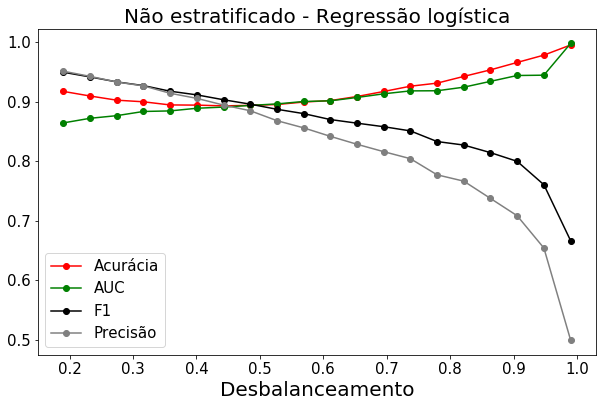

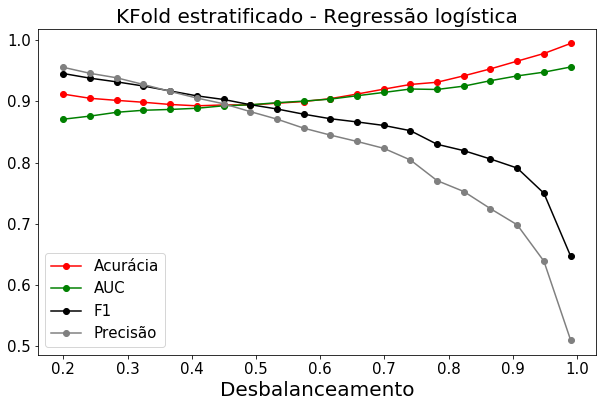

In [466]:
from sklearn.linear_model import LogisticRegression

classificacao_nao_estratificada(LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000), 'Regressão logística')
classificacao_estratificada(LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000), 'Regressão logística')

KNN

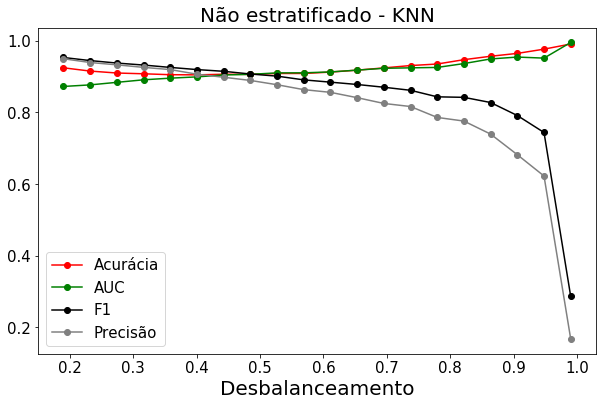

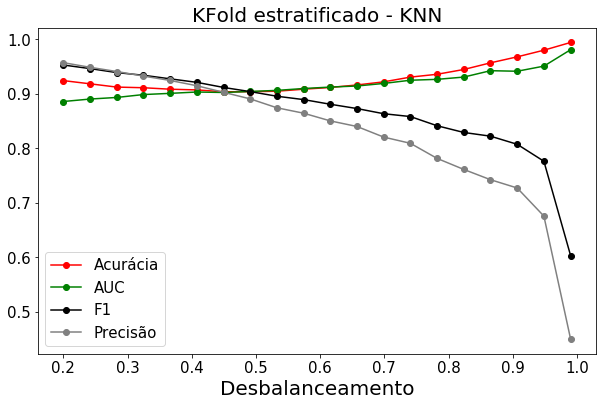

In [468]:
from sklearn.neighbors import KNeighborsClassifier

classificacao_nao_estratificada(KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean'),'KNN')
classificacao_estratificada(KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean'),'KNN')

Naive Bayes

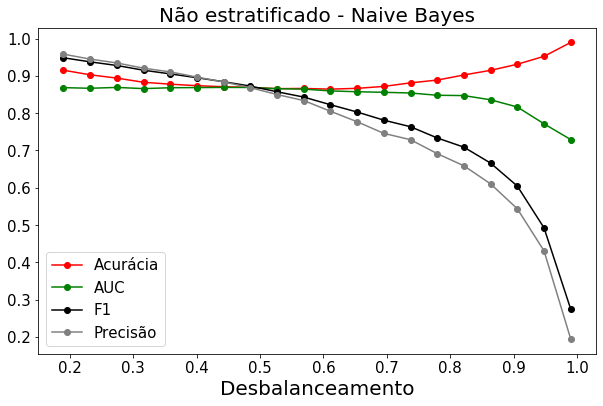

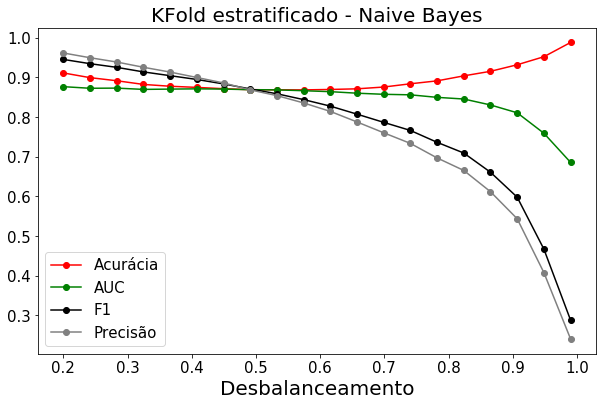

In [469]:
from sklearn.naive_bayes import GaussianNB

classificacao_nao_estratificada(GaussianNB(),'Naive Bayes')
classificacao_estratificada(GaussianNB(),'Naive Bayes')

Quanto maior o desbalanceamento do conjunto de dados observa-se o aumento da sua acurácia, dando a impressão de que o modelo está acertando mais. Porém, diminui rapidamente a precisão, pois no caso o algoritmo está acertando mais por apontar a classe dominante. De modo que a precisão para acertar aqueles que são minoria acaba sendo baixa.   

# 10)

Realize a classificação da base Titanic. Use os métodos de seleção de modelos e determine o melhor
modelo e seus hiperparâmetros.

## Pré-processamento dos dados

In [7]:
import pandas as pd

dfids = pd.read_csv('titanic/gender_submission.csv')
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
classes = train.columns
print(classes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
import numpy as np

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train = pd.get_dummies(train)
Id_test_pass = test['PassengerId']
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test = pd.get_dummies(test)


averages = train.mean(axis=0)
nrow,ncol = train.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(train.iloc[i,j]) == True):
            train.iloc[i,j] = averages[j]

averages_test = test.mean(axis=0)
nrow,ncol = test.shape
for i in range(0,nrow):
    for j in range(0,ncol):
        if(np.isnan(test.iloc[i,j]) == True):
            test.iloc[i,j] = averages_test[j]

In [11]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


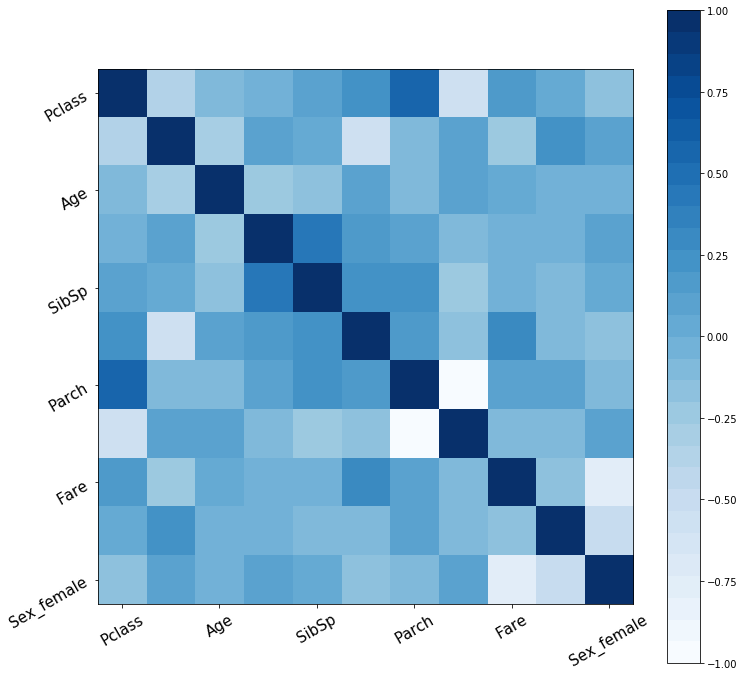

In [14]:
corr_visualize(train)

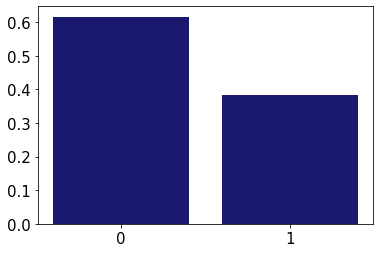

In [16]:
data = [len(train[train['Survived'] == 0])/len(train['Survived']), len(train[train['Survived'] == 1])/len(train['Survived'])]

plt.bar([0,1],data, color ='midnightblue')
plt.xticks([0,1], fontsize = 15)
plt.yticks(np.linspace(0,0.6,7), fontsize = 15)
plt.show()

## Normalizando os dados 

In [17]:
from sklearn.preprocessing import StandardScaler

train = train.to_numpy()
test = test.to_numpy()

X = train[:,1:]
y = train[:,0]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

scaler = StandardScaler().fit(test)
X_test = scaler.transform(test)

## Classificação com nested cross validation

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

def nested_cross_validation(X, y, model, n_folds, k_folds, params_grid):
    score = 10
    best_estimator = None
    kfold = KFold(n_folds, shuffle = True)
    macur, mauc, mprec, mf1 = [],[],[],[]
    
    for train_index, test_index in kfold.split(X):
        x_train, y_train, x_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
        
        gs = GridSearchCV(model, params_grid, cv = k_folds, refit = True)
        gs_result = gs.fit(x_train, y_train)
        
        best_estim = gs_result.best_estimator_
        y_pred = best_estim.predict(x_test)
        
        if(gs_result.best_score_ < score):
            score = gs_result.best_score_
            best_params = gs_result.best_params_
            best_estimator = gs_result.best_estimator_
            #print('olá')
        
        macur.append(accuracy_score(y_pred,y_test))
        mprec.append(precision_score(y_pred,y_test))
        mauc.append(roc_auc_score(y_pred,y_test))
        mf1.append(f1_score(y_pred,y_test))
        #print(best_estim)
    average = [np.mean(macur), np.mean(mprec), np.mean(mauc), np.mean(mf1)]
    std = [np.std(macur), np.std(mprec), np.std(mauc), np.std(mf1)]
    metrics = ['Acurácia','Precisão','AUC','F1']
    result = {'Métrica': metrics, 'Mean': average, 'Desvio padrão':std}
    
    return pd.DataFrame(result), best_estimator


In [190]:
mean_ncv = []

**Árvore de Decisão**

In [182]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
n_folds = 5
k_folds = 10
table_result, best_estimator = nested_cross_validation(X, y, model, n_folds, k_folds, params)

In [183]:
print('Resultados:\n',table_result)
print('\n\nMelhor estimador:\n',best_estimator)

Resultados:
     Métrica      Mean  Desvio padrão
0  Acurácia  0.811431       0.025882
1  Precisão  0.694935       0.076218
2       AUC  0.807399       0.019451
3        F1  0.737031       0.041117


Melhor estimador:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [191]:
media = float(table_result['Mean'][table_result['Métrica'] == 'Acurácia'])
mean_ncv.append(media)

**KNN**

In [192]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
params = {
    'n_neighbors':np.arange(1,30),
    'metric':['euclidean','manhattan', 'minkowski']
}
n_folds = 5
k_folds = 10
table_result, best_estimator = nested_cross_validation(X, y, model, n_folds, k_folds, params)

In [193]:
print('Resultados:\n',table_result)
print('\n\nMelhor estimador:\n',best_estimator)

Resultados:
     Métrica      Mean  Desvio padrão
0  Acurácia  0.807030       0.034384
1  Precisão  0.651585       0.049218
2       AUC  0.807623       0.032089
3        F1  0.721479       0.041701


Melhor estimador:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')


In [194]:
media = float(table_result['Mean'][table_result['Métrica'] == 'Acurácia'])
mean_ncv.append(media)

**Random Forest**

In [195]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(random_state=42)

params = { 
    'n_estimators': [100, 200],
    'criterion' :['gini', 'entropy']
}
n_folds = 10
k_folds = 5
table_result, best_estimator = nested_cross_validation(X, y, model, n_folds, k_folds, params)

In [196]:
print('Resultados:\n',table_result)
print('\n\nMelhor estimador:\n',best_estimator)

Resultados:
     Métrica      Mean  Desvio padrão
0  Acurácia  0.818140       0.031888
1  Precisão  0.742904       0.089366
2       AUC  0.808658       0.038773
3        F1  0.752301       0.062501


Melhor estimador:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [197]:
media = float(table_result['Mean'][table_result['Métrica'] == 'Acurácia'])
mean_ncv.append(media)

**Regressão Logística**

In [198]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
params = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
n_folds = 5
k_folds = 10
table_result, best_estimator = nested_cross_validation(X, y, model, n_folds, k_folds, params)

In [199]:
print('Resultados:\n',table_result)
print('\n\nMelhor estimador:\n',best_estimator)

Resultados:
     Métrica      Mean  Desvio padrão
0  Acurácia  0.800245       0.018075
1  Precisão  0.704699       0.056535
2       AUC  0.790026       0.009787
3        F1  0.727840       0.027658


Melhor estimador:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [200]:
media = float(table_result['Mean'][table_result['Métrica'] == 'Acurácia'])
mean_ncv.append(media)

**Naive Bayes**

In [201]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
n_folds = 10
k_folds = 5

kfold = KFold(n_folds, shuffle = True)
macur, mauc, mprec, mf1 = [],[],[],[]

for train_index, test_index in kfold.split(X):
    x_train, y_train, x_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    macur.append(accuracy_score(y_pred,y_test))
    mprec.append(precision_score(y_pred,y_test))
    mauc.append(roc_auc_score(y_pred,y_test))
    mf1.append(f1_score(y_pred,y_test))
average = [np.mean(macur), np.mean(mprec), np.mean(mauc), np.mean(mf1)]
std = [np.std(macur), np.std(mprec), np.std(mauc), np.std(mf1)]
metrics = ['Acurácia','Precisão','AUC','F1']
result = {'Métrica': metrics, 'Mean': average, 'Desvio padrão':std}
table_result = pd.DataFrame(result)
table_result

,Métrica,Mean,Desvio padrão
0,Acurácia,0.791211,0.035416
1,Precisão,0.736028,0.065042
2,AUC,0.778991,0.035907
3,F1,0.727535,0.046767


In [202]:
media = float(table_result['Mean'][table_result['Métrica'] == 'Acurácia'])
mean_ncv.append(media)

In [50]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
n_folds = 10
k_folds = 5

kfold = KFold(n_folds, shuffle = True)
macur, mauc, mprec, mf1 = [],[],[],[]

for train_index, test_index in kfold.split(X):
    x_train, y_train, x_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    macur.append(accuracy_score(y_pred,y_test))
    mprec.append(precision_score(y_pred,y_test))
    mauc.append(roc_auc_score(y_pred,y_test))
    mf1.append(f1_score(y_pred,y_test))
average = [np.mean(macur), np.mean(mprec), np.mean(mauc), np.mean(mf1)]
std = [np.std(macur), np.std(mprec), np.std(mauc), np.std(mf1)]
metrics = ['Acurácia','Precisão','AUC','F1']
result = {'Métrica': metrics, 'Mean': average, 'Desvio padrão':std}
pd.DataFrame(result)

,Métrica,Mean,Desvio padrão
0,Acurácia,0.778876,0.046438
1,Precisão,0.711989,0.076966
2,AUC,0.767902,0.044831
3,F1,0.711066,0.055174


Text(0.5, 0, 'Modelo')

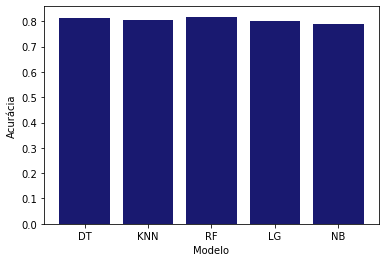

In [205]:
metodos = ['DT','KNN','RF','LG','NB']
plt.bar(metodos,mean_ncv, color = 'midnightblue')
plt.ylabel('Acurácia')
plt.xlabel('Modelo')


### Classificação utilizando a seleção de atributos

In [57]:
from sklearn.preprocessing import StandardScaler

#train = train.to_numpy()
#test = test.to_numpy()

X = train[:,1:]
y = train[:,0]

scaler = StandardScaler(with_mean = False).fit(X)
X = scaler.transform(X)

scaler = StandardScaler().fit(test)
X_test = scaler.transform(test)

**Seleção de atributos utilizando chi2**

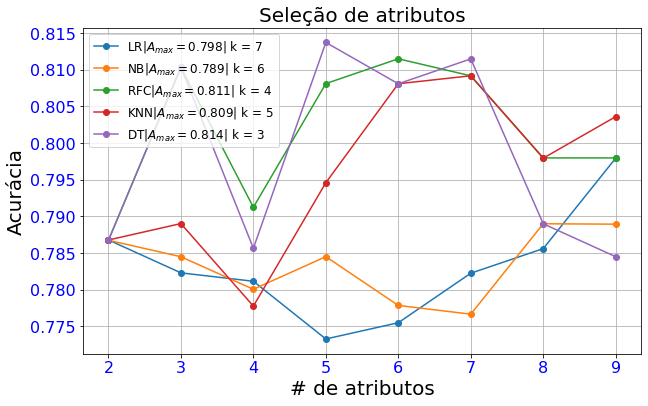

In [110]:
from sklearn.feature_selection import SelectKBest, chi2


n_folds = 5 
k_folds = 10 


## modelos e seus parâmetros que serão verificados
models = [LogisticRegression(max_iter=1000),GaussianNB(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]
params = [{},{},{},{},{}]
labels = ['LR','NB','RFC','KNN','DT']

## cria figura
fig,axs = plt.subplots(figsize = (10,6))
axs.set_title('Seleção de atributos', fontsize = 20)

for model, parameters, label in zip(models,params,labels):
    vsel = []
    vstd = []
    for k in range(2, X.shape[1]):
        fsel = SelectKBest(score_func=chi2, k=k)
        Xnew = fsel.fit_transform(X, y)
        table_result,best_estimator = nested_cross_validation(Xnew, y, model, n_folds, k_folds ,parameters)
        acur = table_result[table_result['Métrica'] == 'Acurácia']
        
        vsel.append(float(acur['Mean']))
        vstd.append(float(acur['Desvio padrão']))    
        
    lab = label+'|$A_{max} = $' + str(np.round(max(vsel),3)) + '| k = '+str(np.argmax(vsel))
    axs.plot(range(2, X.shape[1]), vsel, 'o-',label = lab)
    
axs.set_xlabel('# de atributos', fontsize=20)
axs.set_ylabel('Acurácia', fontsize=20);
plt.xticks(color='blue', size=16)
plt.yticks(color='blue', size=16)
plt.grid('--')
axs.legend(fontsize = 12)
plt.show()

**Seleção de atributos utilizando f_classif**

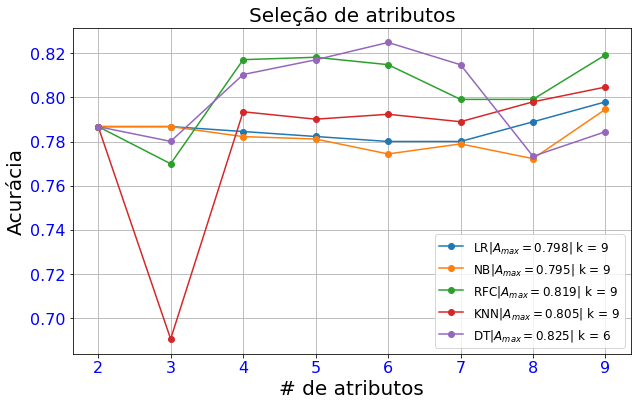

In [179]:
from sklearn.feature_selection import SelectKBest, f_classif


n_folds = 5 
k_folds = 10 


## modelos e seus parâmetros que serão verificados
models = [LogisticRegression(max_iter=1000),GaussianNB(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]
params = [{},{},{},{},{}]
labels = ['LR','NB','RFC','KNN','DT']

## cria figura
fig,axs = plt.subplots(figsize = (10,6))
axs.set_title('Seleção de atributos', fontsize = 20)

for model, parameters, label in zip(models,params,labels):
    vsel = []
    vstd = []
    for k in range(2, X.shape[1]):
        fsel = SelectKBest(score_func=f_classif, k=k)
        Xnew = fsel.fit_transform(X, y)
        table_result,best_estimator = nested_cross_validation(Xnew, y, model, n_folds, k_folds ,parameters)
        acur = table_result[table_result['Métrica'] == 'Acurácia']
        
        vsel.append(float(acur['Mean']))
        vstd.append(float(acur['Desvio padrão']))    
        
    lab = label+'|$A_{max} = $' + str(np.round(max(vsel),3)) + '| k = '+str(np.argmax(vsel)+2)
    axs.plot(range(2, X.shape[1]), vsel, 'o-',label = lab)
    
axs.set_xlabel('# de atributos', fontsize=20)
axs.set_ylabel('Acurácia', fontsize=20);
plt.xticks(color='blue', size=16)
plt.yticks(color='blue', size=16)
plt.grid('--')
axs.legend(fontsize = 12)
plt.show()

### Classificaçao estratificada

In [130]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

def Stratified_K(X,y,model, params, n_folds, k_folds):
    #n = 10
    skf = StratifiedKFold(n_splits = n_folds, shuffle = True)
    score = 10
    macur,mauc,mf1,mprec = [],[],[],[]
    for train_index, test_index in skf.split(X,y):
        x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        
        # k = 5
        gs = GridSearchCV(model, params, cv = k_folds, refit = True)
        gs_result = gs.fit(x_train, y_train)
        
        best_estim = gs_result.best_estimator_
        y_pred = best_estim.predict(x_test)
        
        if(gs_result.best_score_ < score):
            score = gs_result.best_score_
            best_params = gs_result.best_params_
            best_estimator = gs_result.best_estimator_
            #print('olá')
        

        macur.append(accuracy_score(y_pred,y_test))
        mauc.append(roc_auc_score(y_pred,y_test))
        mf1.append(f1_score(y_pred,y_test))
        mprec.append(precision_score(y_pred,y_test))
    davg = [np.mean(macur),np.mean(mauc),np.mean(mf1),np.mean(mprec)]
    dstd = [np.std(macur),np.std(mauc),np.std(mf1),np.std(mprec)]
    data = {'Medida':['Acurácia','AUC','F1','Precisão'],'mean':davg,'std': dstd}
    return pd.DataFrame(data), best_estimator

In [227]:
mean_skf = []

**KNN**

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = train[:,1:]
y = train[:,0]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

scaler = StandardScaler().fit(test)
X_test = scaler.transform(test)

params = {'n_neighbors': np.arange(1,50),'metric':['euclidean','manhattan','minkowski']}
table_results, best_estimator = Stratified_K(X,y, KNeighborsClassifier(), params,10,5)

In [229]:
table_results

,Medida,mean,std
0,Acurácia,0.817054,0.036622
1,AUC,0.822385,0.041936
2,F1,0.734877,0.056805
3,Precisão,0.667059,0.085438


In [230]:
best_estimator

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [231]:
media = float(table_results['mean'][table_results['Medida'] == 'Acurácia'])
mean_skf.append(media)

**Random Forest**

In [232]:
params = {'max_depth': [10, 100, None],
          'criterion' :['gini', 'entropy']
         }
table_results, best_estimator = Stratified_K(X,y, RandomForestClassifier(), params,10,5)

In [233]:
table_results

,Medida,mean,std
0,Acurácia,0.828352,0.036838
1,AUC,0.828092,0.042697
2,F1,0.765154,0.046347
3,Precisão,0.728067,0.064420


In [234]:
best_estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [235]:
media = float(table_results['mean'][table_results['Medida'] == 'Acurácia'])
mean_skf.append(media)

**Regressão logística**

In [236]:
model = LogisticRegression()
params = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
table_results, best_estimator = Stratified_K(X,y, model, params,10,5)

In [237]:
table_results

,Medida,mean,std
0,Acurácia,0.788989,0.032556
1,AUC,0.781734,0.037637
2,F1,0.712893,0.049317
3,Precisão,0.686891,0.077408


In [238]:
best_estimator

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
media = float(table_results['mean'][table_results['Medida'] == 'Acurácia'])
mean_skf.append(media)

**Decision Tree**

In [240]:
model = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
table_results, best_estimator = Stratified_K(X,y, model, params,10,5)

In [241]:
table_results

,Medida,mean,std
0,Acurácia,0.812572,0.035888
1,AUC,0.807863,0.037077
2,F1,0.739989,0.061803
3,Precisão,0.704622,0.092557


In [242]:
best_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [243]:
media = float(table_results['mean'][table_results['Medida'] == 'Acurácia'])
mean_skf.append(media)

**Naive Bayes**

In [244]:
model = GaussianNB()
params = {}
table_results, best_estimator = Stratified_K(X,y, model, params,10,5)

In [245]:
table_results

,Medida,mean,std
0,Acurácia,0.792322,0.048418
1,AUC,0.781642,0.052003
2,F1,0.730700,0.064724
3,Precisão,0.736387,0.076631


In [246]:
best_estimator

GaussianNB(priors=None, var_smoothing=1e-09)

In [247]:
media = float(table_results['mean'][table_results['Medida'] == 'Acurácia'])
mean_skf.append(media)

Text(0.5, 0, 'Modelo')

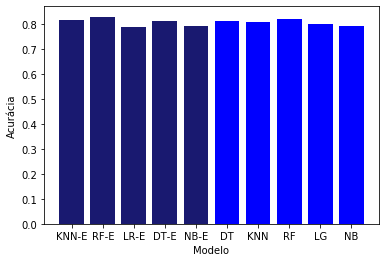

In [253]:
metodos1 = ['DT','KNN','RF','LG','NB']
metodos2 = ['KNN-E','RF-E','LR-E','DT-E','NB-E']
plt.title('')
plt.bar(metodos2,mean_skf, color = 'midnightblue')
plt.bar(metodos1,mean_ncv, color = 'blue')
plt.ylabel('Acurácia')
plt.xlabel('Modelo')

Observando as acurácias do caso estratificado e não estratificado vemos que o **Random forest estratificado** obteve os melhores resultados para a acurácia ($0.828352 \pm 0.036838$) e para precisão. O melhor estimador foi:

In [252]:
'''
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
                       
'''

"\nRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='entropy', max_depth=10, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=None,\n                       verbose=0, warm_start=False)\n                       \n"